In [5]:
%load_ext autoreload
%autoreload complete

## Standard models

In [12]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("0.35")
df = df.sort_values("mae_std", ascending=True).drop_duplicates(
    ["method", "n_days_train"]
)
df[
    [
        "method",
        "n_days_train",
        "mae_mean",
        "mae_std",
        "protest_impact_diff_mean_week_1",
        "protest_impact_diff_std_week_1",
        "semi_random_impact_diff_mean_week_1",
        "random_impact_diff_mean_week_1",
        "protest_impact_diff_mean",
        "protest_impact_diff_std",
        "semi_random_impact_diff_mean",
        "random_impact_diff_mean",
    ]
]

,method,n_days_train,mae_mean,mae_std,protest_impact_diff_mean_week_1,protest_impact_diff_std_week_1,semi_random_impact_diff_mean_week_1,random_impact_diff_mean_week_1,protest_impact_diff_mean,protest_impact_diff_std,semi_random_impact_diff_mean,random_impact_diff_mean
10,linear_regression,84,0.256622,0.144774,0.076001,0.352688,0.007599,0.006749,0.012131,0.331655,0.011855,0.011438
1,mean,84,0.277411,0.157448,0.039629,0.394809,0.008361,0.010576,-0.005454,0.379570,0.010989,0.012428
3,distance_weights,84,0.268354,0.158594,0.034983,0.393965,0.009459,0.010339,-0.007353,0.384383,0.012331,0.013281
14,gam,84,0.359544,0.210107,0.137929,0.474491,0.071064,0.070809,0.087723,0.478179,0.093154,0.092519
0,lasso,84,0.287148,0.241220,0.125173,0.495848,0.146639,0.002438,0.026482,0.422494,0.051902,0.014780


linear_regression 84
protest
random


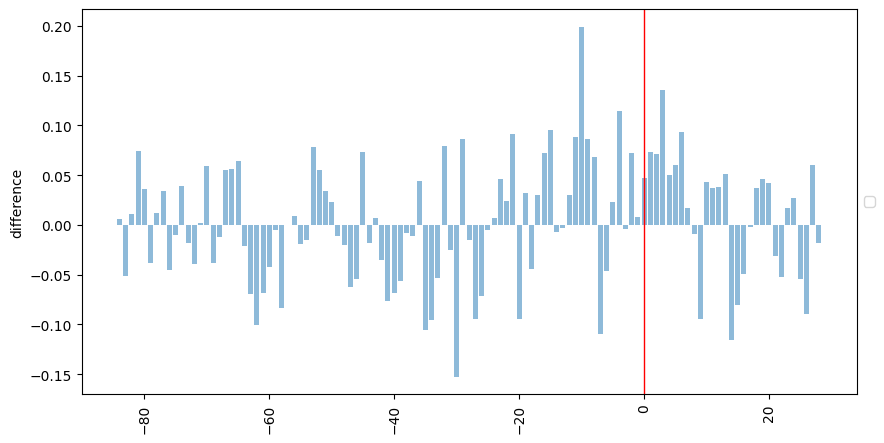

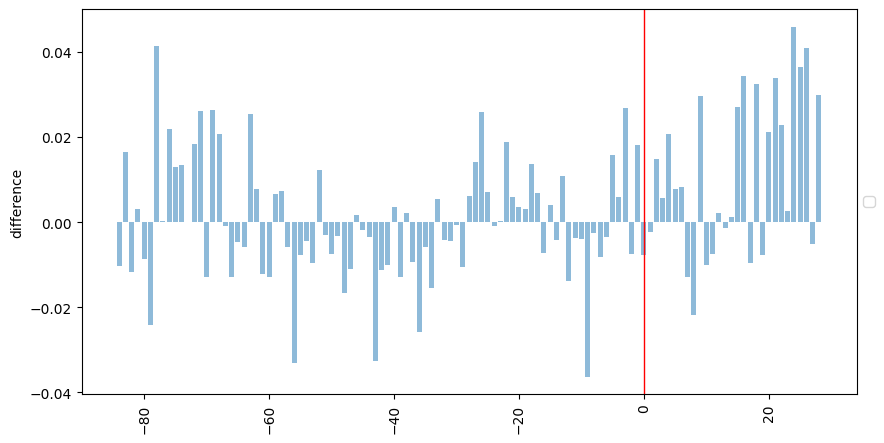

mean 84
protest
random


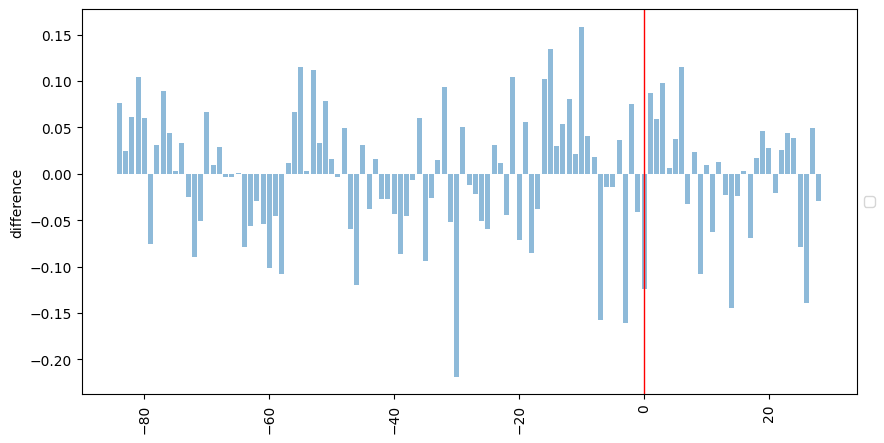

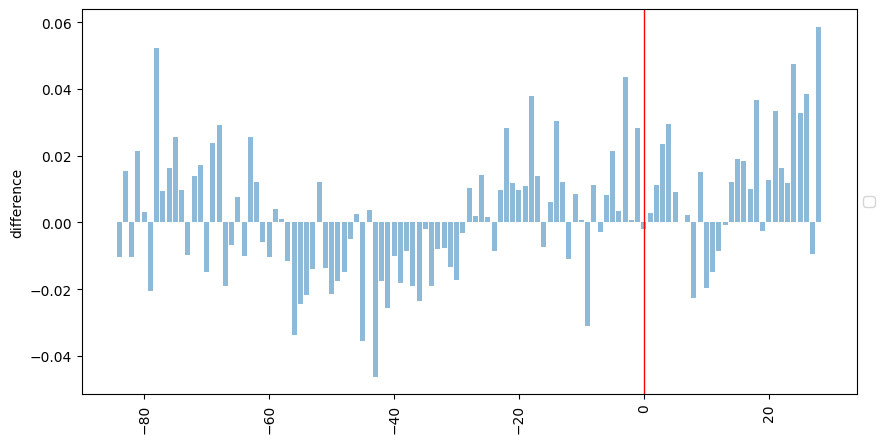

distance_weights 84
protest
random


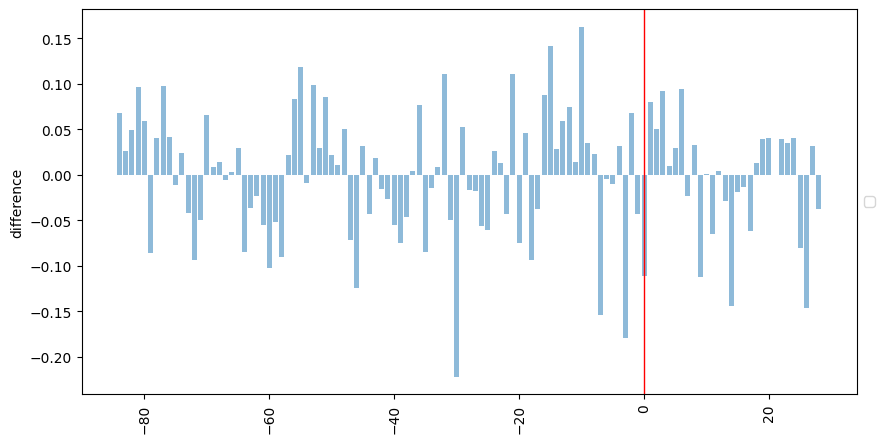

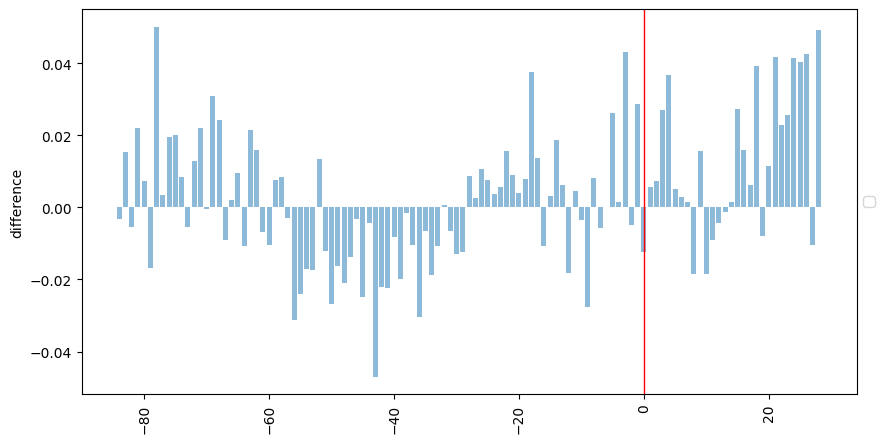

gam 84
protest
random


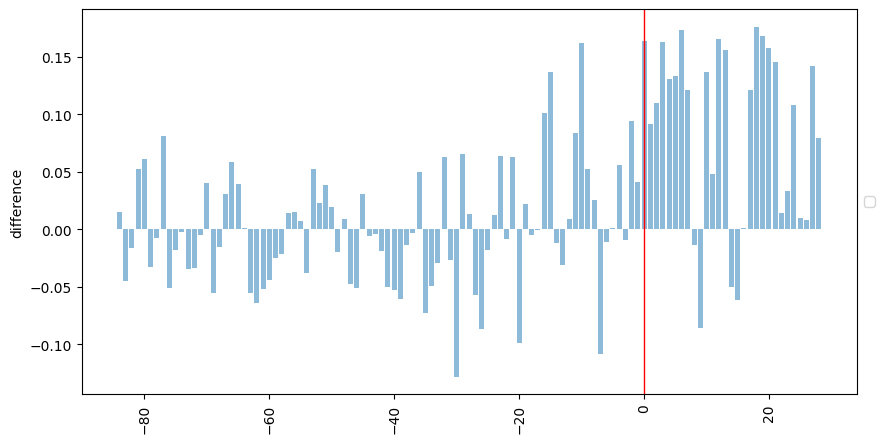

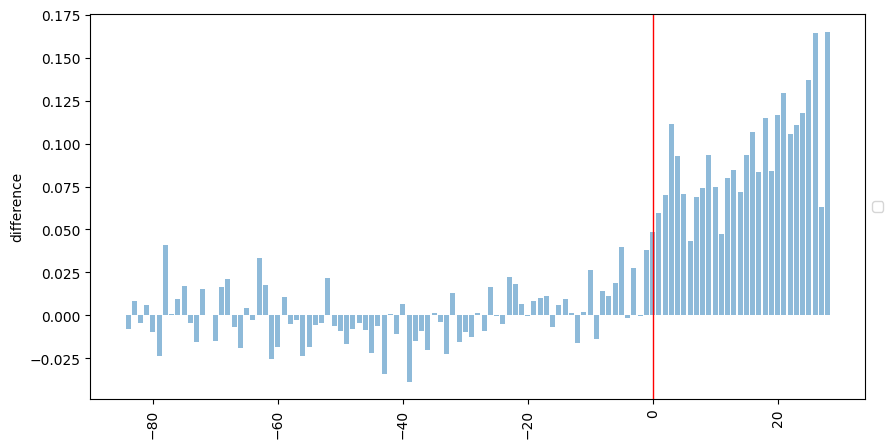

lasso 84
protest
random


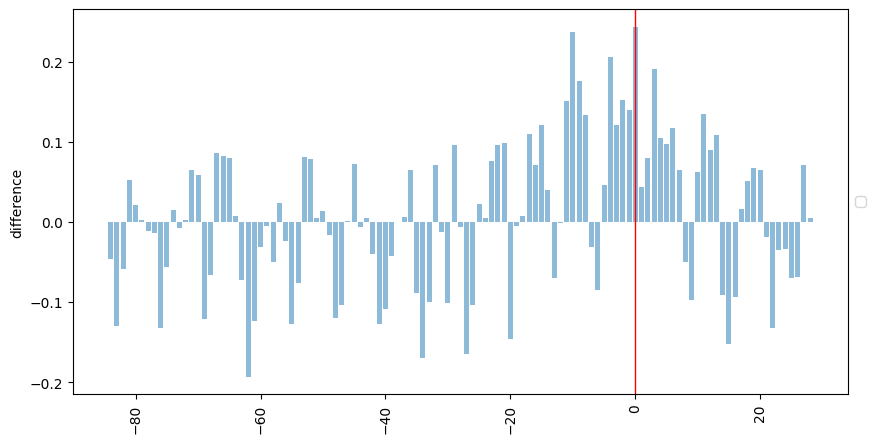

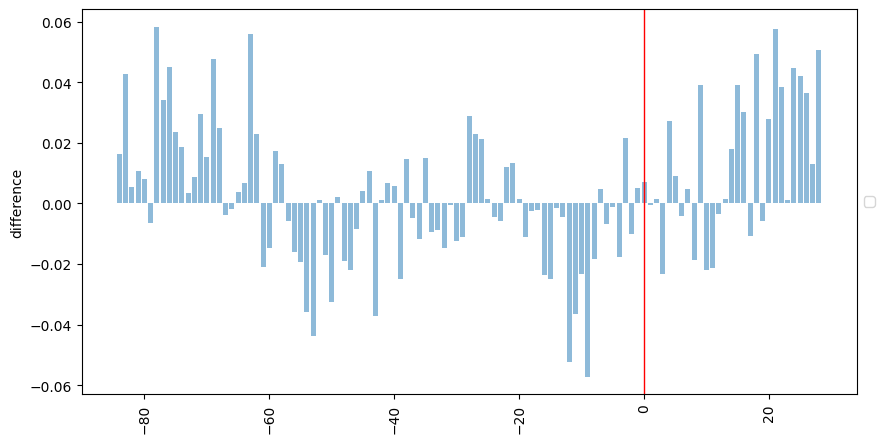

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from protest_impact.data.discourse.visual import plot_comparison, plot_difference

for row in df.itertuples():
    print(row.method, row.n_days_train)
    print("protest")
    agg_df = pd.DataFrame(row.agg_df_protest)
    agg_df = agg_df.groupby("date", as_index=False).mean()
    plot_difference(agg_df, protest_date=0)
    print("random")
    agg_df = pd.DataFrame(row.agg_df_random)
    agg_df = agg_df.groupby("date", as_index=False).mean()
    plot_difference(agg_df, protest_date=0)
    plt.show()
    print("==========")

Lasso and GAM estimate a higher impact. Especially GAM models the pre-protest period better. But are there reasons why GAMs would be better than the other models? It seems to be slightly inferior on predicting on random events. Maybe predicting on random events is not a good idea? But what would be then?

Probably the GAMs are just overfitting, I should evaluate that.

I had not seen the bias of GAMs. They are obviously not suitable.

In [26]:
df = get_study_df("0.38")
df = df.sort_values("mae_std", ascending=True).drop_duplicates(
    ["method", "n_days_train", "use_autoregressor"]
)
df[
    [
        "method",
        "use_autoregressor",
        "n_days_train",
        "mae_mean",
        "mae_std",
        "protest_impact_diff_mean_week_1",
        "protest_impact_diff_std_week_1",
        "semi_random_impact_diff_mean_week_1",
        "random_impact_diff_mean_week_1",
        "protest_impact_diff_mean",
        "protest_impact_diff_std",
        "semi_random_impact_diff_mean",
        "random_impact_diff_mean",
    ]
]

,method,use_autoregressor,n_days_train,mae_mean,mae_std,protest_impact_diff_mean_week_1,protest_impact_diff_std_week_1,semi_random_impact_diff_mean_week_1,random_impact_diff_mean_week_1,protest_impact_diff_mean,protest_impact_diff_std,semi_random_impact_diff_mean,random_impact_diff_mean
40,linear_regression,True,84.0,2.953852e-01,1.343217e-01,0.030328,0.379960,0.001116,0.001989,-1.445337e-02,3.793906e-01,-9.430012e-03,-9.031287e-03
46,linear_regression,False,84.0,2.536915e-01,1.367281e-01,0.076001,0.352688,0.011217,0.010363,1.321532e-02,3.318519e-01,1.501128e-02,1.452887e-02
47,gradient_boosting,False,84.0,2.967144e-01,1.479148e-01,0.105928,0.398304,0.019474,0.018478,4.097162e-02,3.851507e-01,3.559670e-02,3.576222e-02
48,random_forest,True,84.0,2.805761e-01,1.521175e-01,0.084792,0.385748,0.016128,0.014697,2.389745e-03,3.837248e-01,2.385603e-02,2.386497e-02
41,random_forest,False,84.0,2.785380e-01,1.536836e-01,0.108589,0.380176,0.013160,0.012563,3.587895e-02,3.718556e-01,2.223547e-02,2.260342e-02
44,gradient_boosting,True,84.0,2.934367e-01,1.614877e-01,0.064513,0.394940,0.009265,0.007630,-2.300350e-02,4.102297e-01,2.531012e-02,2.496161e-02
35,lasso,True,84.0,1.627149e+23,2.931221e+24,0.287280,56.347628,109508.513691,-23800.348623,3.947121e+07,3.958428e+09,-1.001302e+28,-1.603028e+23


## Skforecast

linear_regression 84.0 True
protest


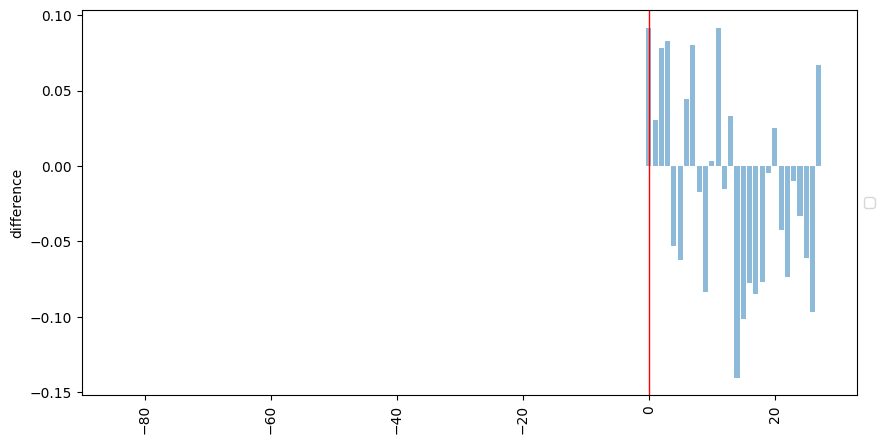

random


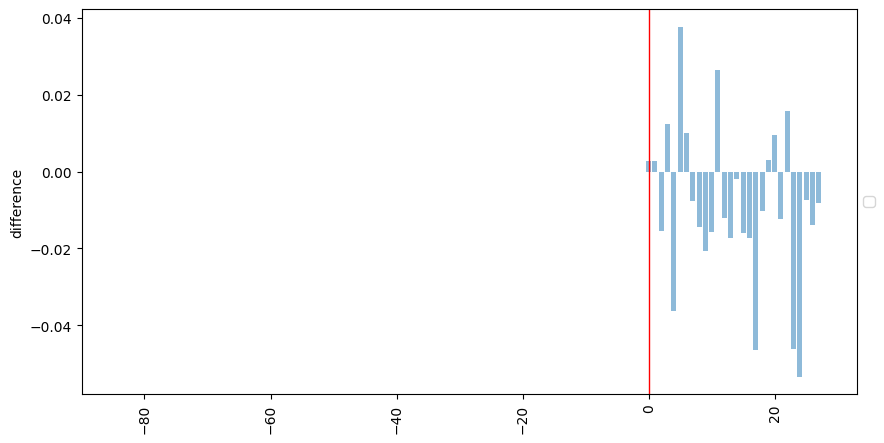

random_forest 84.0 True
protest


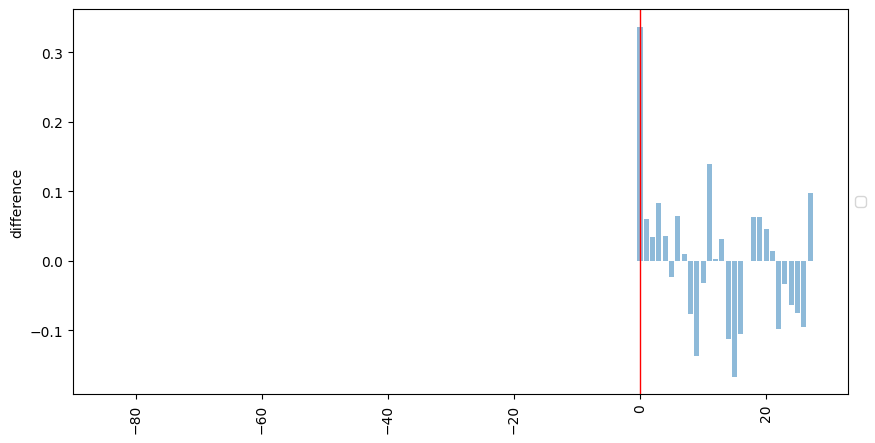

random


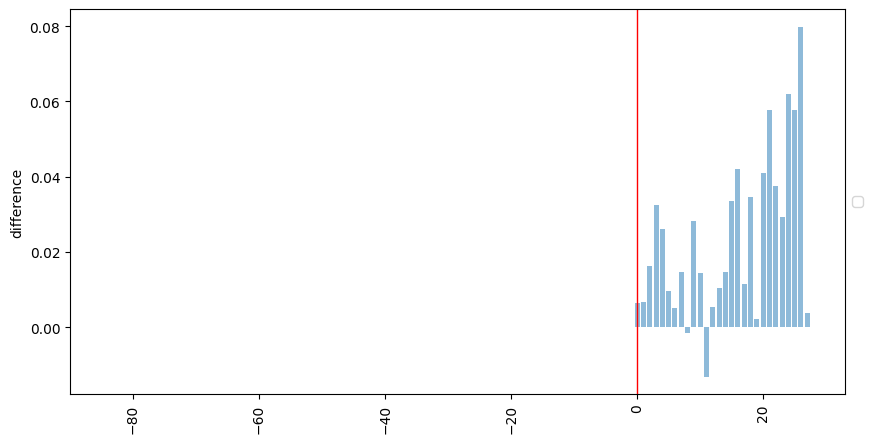

gradient_boosting 84.0 True
protest


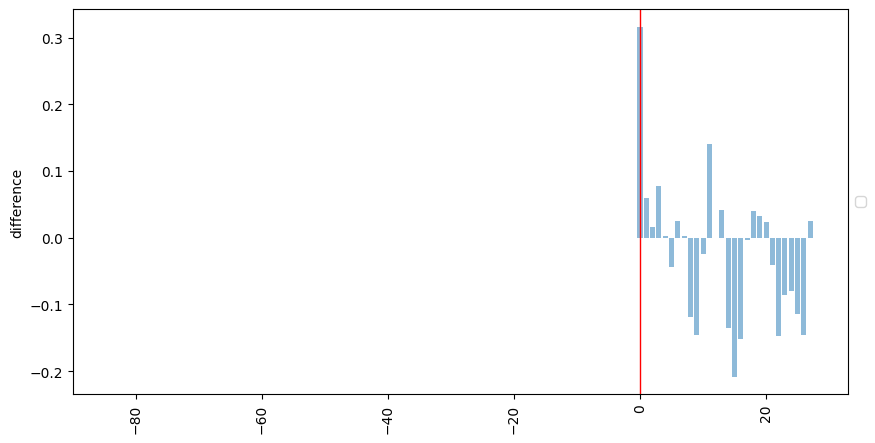

random


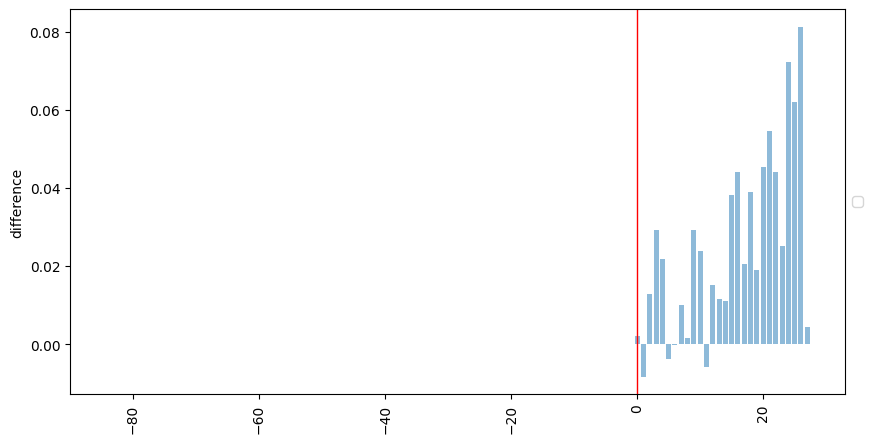

lasso 84.0 True
protest


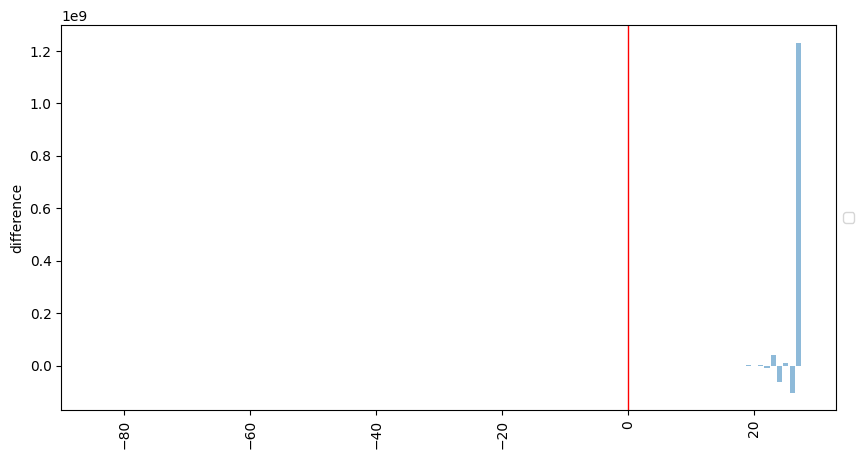

random


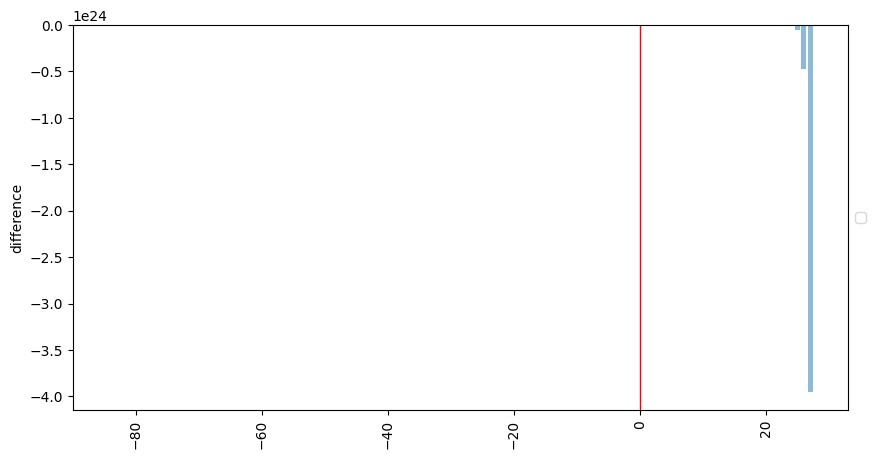

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from protest_impact.data.discourse.visual import plot_comparison, plot_difference

for row in df[df.use_autoregressor == True].itertuples():
    print(row.method, row.n_days_train, row.use_autoregressor)
    print("protest")
    agg_df = pd.DataFrame(row.agg_df_protest)
    agg_df = agg_df.groupby("date", as_index=False).mean()
    plot_difference(agg_df, protest_date=0)
    plt.show()
    print("random")
    agg_df = pd.DataFrame(row.agg_df_random)
    agg_df = agg_df.groupby("date", as_index=False).mean()
    plot_difference(agg_df, protest_date=0)
    plt.show()
    print("==========")

In [48]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("0.39")
df = df.sort_values("mae_std", ascending=True).drop_duplicates(
    ["method", "n_days_train", "use_autoregressor", "lags"]
)
df[
    [
        "method",
        "use_autoregressor",
        "lags",
        "n_days_train",
        "mae_mean",
        "mae_std",
        "protest_impact_diff_mean_week_1",
        "protest_impact_diff_std_week_1",
        "semi_random_impact_diff_mean_week_1",
        "protest_impact_diff_mean",
        "protest_impact_diff_std",
        "semi_random_impact_diff_mean",
    ]
]

,method,use_autoregressor,lags,n_days_train,mae_mean,mae_std,protest_impact_diff_mean_week_1,protest_impact_diff_std_week_1,semi_random_impact_diff_mean_week_1,protest_impact_diff_mean,protest_impact_diff_std,semi_random_impact_diff_mean
17,linear_regression,True,14.0,168.0,0.264296,1.306491e-01,0.033402,0.346318,0.003107,-1.016561e-02,3.505863e-01,-0.003622
34,linear_regression,False,NaN,84.0,0.255879,1.448090e-01,0.076001,0.352688,0.007389,1.321532e-02,3.318519e-01,0.010927
30,random_forest,False,NaN,84.0,0.278845,1.538118e-01,0.108589,0.380176,0.013513,3.587895e-02,3.718556e-01,0.022367
19,random_forest,True,14.0,84.0,0.283179,1.556860e-01,0.084792,0.385748,0.016304,2.389745e-03,3.837248e-01,0.026434
16,linear_regression,True,14.0,84.0,0.297217,1.564690e-01,0.030328,0.379960,0.016402,-1.445337e-02,3.793906e-01,0.003394
27,linear_regression,True,28.0,336.0,0.266277,1.570212e-01,0.057290,0.354478,-0.006555,1.254995e-02,3.461866e-01,-0.011276
29,random_forest,True,14.0,336.0,0.264004,1.626311e-01,0.094731,0.413160,0.002926,1.642617e-02,3.656511e-01,0.000040
33,linear_regression,False,NaN,336.0,0.256033,1.629178e-01,0.144043,0.413121,-0.005182,6.990115e-02,3.642753e-01,-0.007977
35,linear_regression,False,NaN,168.0,0.259994,1.632346e-01,0.099930,0.378672,0.001449,3.511223e-02,3.529929e-01,0.001459
23,linear_regression,True,7.0,168.0,0.265289,1.645711e-01,0.023862,0.340060,0.002084,-1.521988e-02,3.381878e-01,-0.001501


## tfcausalimpact

In [71]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("0.41")
df = df.sort_values("mae_std", ascending=True)
df = df[df["protest_post_diff_mean_week_1"].notna()]
df = df[df["sample_size"] > 1]
df[
    [
        "method",
        "sample_size",
        "n_days_train",
        "mae_mean",
        "mae_std",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_std_week_1",
        "semi_random_post_diff_mean_week_1",
        "random_post_diff_mean_week_1",
        "protest_post_diff_mean",
        "protest_post_diff_std",
        "semi_random_post_diff_mean",
        "random_post_diff_mean",
    ]
]
# for k, v in df.iloc[0].items():
#     print(k, v)

,method,sample_size,n_days_train,mae_mean,mae_std,protest_post_diff_mean_week_1,protest_post_diff_std_week_1,semi_random_post_diff_mean_week_1,random_post_diff_mean_week_1,protest_post_diff_mean,protest_post_diff_std,semi_random_post_diff_mean,random_post_diff_mean
5,bayesian_structural_time_series,20,336,0.244404,0.166617,-0.026693,0.245063,-0.061278,-0.060364,-0.042004,0.259236,0.025243,0.02521


bayesian_structural_time_series 336 False
protest


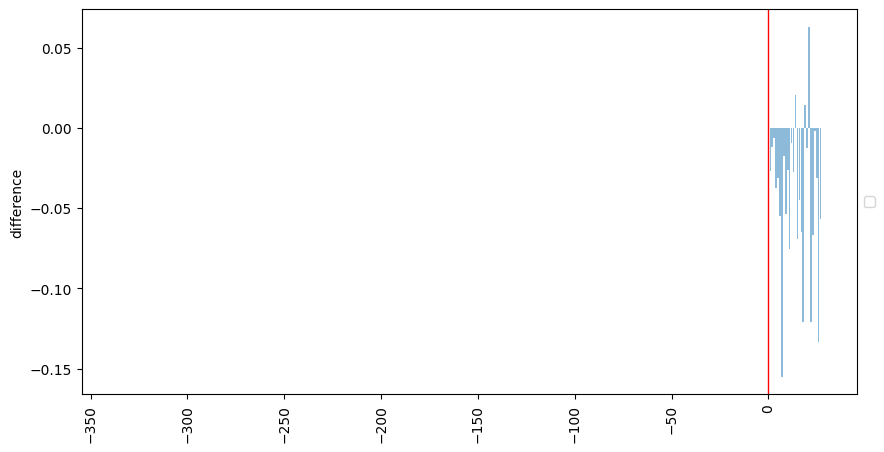

random


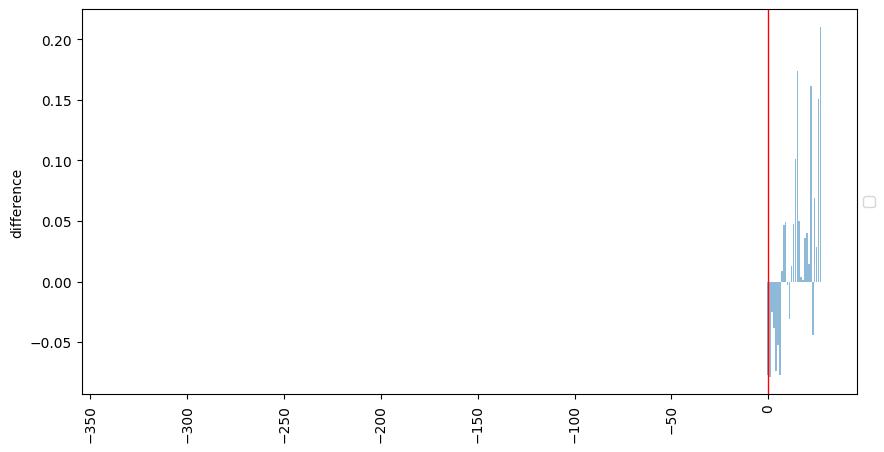

In [73]:
for row in df.itertuples():
    print(row.method, row.n_days_train, row.use_autoregressor)
    print("protest")
    agg_df = pd.DataFrame(row.agg_df_protest)
    agg_df = agg_df.groupby("date", as_index=False).mean()
    plot_difference(agg_df, protest_date=0)
    plt.show()
    print("random")
    agg_df = pd.DataFrame(row.agg_df_random)
    agg_df = agg_df.groupby("date", as_index=False).mean()
    plot_difference(agg_df, protest_date=0)
    plt.show()
    print("==========")

## Weekday dummies, Ridge

In [7]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("0.44")
df = df.sort_values("mae_std", ascending=True)
df[
    [
        "method",
        "weekday_dummies",
        "alpha",
        "mae_mean",
        "mae_std",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_std_week_1",
        "semi_random_post_diff_mean_week_1",
        "random_post_diff_mean_week_1",
        "protest_post_diff_mean",
        "protest_post_diff_std",
        "semi_random_post_diff_mean",
        "random_post_diff_mean",
    ]
]

,method,weekday_dummies,alpha,mae_mean,mae_std,protest_post_diff_mean_week_1,protest_post_diff_std_week_1,semi_random_post_diff_mean_week_1,random_post_diff_mean_week_1,protest_post_diff_mean,protest_post_diff_std,semi_random_post_diff_mean,random_post_diff_mean
19,linear_regression,True,0.5,0.268852,0.159373,0.065643,0.309808,-0.049113,-0.049239,0.005995,0.285137,-0.009709,-0.008499
4,linear_regression,True,0.1,0.268852,0.159373,0.065643,0.309808,-0.049113,-0.049239,0.005995,0.285137,-0.009709,-0.008499
6,linear_regression,True,1.0,0.268852,0.159373,0.065643,0.309808,-0.049113,-0.049239,0.005995,0.285137,-0.009709,-0.008499
7,ridge,True,0.5,0.268696,0.159647,0.065411,0.309593,-0.049166,-0.049292,0.005831,0.284965,-0.009816,-0.008601
10,ridge,True,0.1,0.268696,0.159647,0.065411,0.309593,-0.049166,-0.049292,0.005831,0.284965,-0.009816,-0.008601
13,ridge,True,1.0,0.268696,0.159647,0.065411,0.309593,-0.049166,-0.049292,0.005831,0.284965,-0.009816,-0.008601
17,lasso,False,0.1,0.283164,0.166263,0.095899,0.367774,-0.050768,-0.051114,0.023801,0.324412,-0.014523,-0.012804
11,linear_regression,False,0.5,0.268764,0.166824,0.056850,0.306598,-0.051852,-0.051916,-0.000144,0.284265,-0.013747,-0.012429
18,linear_regression,False,0.1,0.268764,0.166824,0.056850,0.306598,-0.051852,-0.051916,-0.000144,0.284265,-0.013747,-0.012429
14,linear_regression,False,1.0,0.268764,0.166824,0.056850,0.306598,-0.051852,-0.051916,-0.000144,0.284265,-0.013747,-0.012429


## Weekday interactions

In [28]:
from protest_impact.synthetic_region.hyperopt import get_study_df

df = get_study_df("0.46")
df = df.sort_values("mae_std", ascending=True)
df[
    [
        "method",
        "alpha",
        "weekdays",
        "mae_mean",
        "mae_std",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_std_week_1",
        "semi_random_post_diff_mean_week_1",
        "random_post_diff_mean_week_1",
        "protest_post_diff_mean",
        "protest_post_diff_std",
        "semi_random_post_diff_mean",
        "random_post_diff_mean",
    ]
]

,method,alpha,weekdays,mae_mean,mae_std,protest_post_diff_mean_week_1,protest_post_diff_std_week_1,semi_random_post_diff_mean_week_1,random_post_diff_mean_week_1,protest_post_diff_mean,protest_post_diff_std,semi_random_post_diff_mean,random_post_diff_mean
5,linear_regression,0.1,None,0.267099,0.154199,0.056850,0.306598,-0.069564,-0.072789,-0.000144,0.284265,-0.033877,-0.036619
7,linear_regression,0.1,dummies,0.268852,0.159373,0.065643,0.309808,-0.049113,-0.049239,0.005995,0.285137,-0.009709,-0.008499
9,linear_regression,0.1,dummies,0.268852,0.159373,0.065643,0.309808,-0.049113,-0.049239,0.005995,0.285137,-0.009709,-0.008499
10,linear_regression,0.1,dummies,0.268852,0.159373,0.065643,0.309808,-0.049113,-0.049239,0.005995,0.285137,-0.009709,-0.008499
1,ridge,0.1,dummies,0.268696,0.159647,0.065411,0.309593,-0.049166,-0.049292,0.005831,0.284965,-0.009816,-0.008601
2,ridge,0.1,dummies,0.268696,0.159647,0.065411,0.309593,-0.049166,-0.049292,0.005831,0.284965,-0.009816,-0.008601
4,ridge,0.1,None,0.268763,0.166827,0.056855,0.306595,-0.051849,-0.051913,-0.000141,0.284263,-0.013749,-0.012431
3,linear_regression,0.1,interactions,0.305917,0.177256,0.070773,0.346921,-0.046148,-0.047033,0.007148,0.314761,-0.019279,-0.017847
6,ridge,0.1,interactions,0.304799,0.177588,0.070744,0.346902,-0.046396,-0.046816,0.006919,0.314483,-0.019018,-0.017550
8,ridge,0.1,interactions,0.304799,0.177588,0.070744,0.346902,-0.046396,-0.046816,0.006919,0.314483,-0.019018,-0.017550


In [29]:
df = get_study_df("0.47")
df = df.sort_values("mae_std", ascending=True)
df[
    [
        "method",
        "alpha",
        "weekdays",
        "mae_mean",
        "mae_std",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_std_week_1",
        "semi_random_post_diff_mean_week_1",
        "random_post_diff_mean_week_1",
        "protest_post_diff_mean",
        "protest_post_diff_std",
        "semi_random_post_diff_mean",
        "random_post_diff_mean",
    ]
]

,method,alpha,weekdays,mae_mean,mae_std,protest_post_diff_mean_week_1,protest_post_diff_std_week_1,semi_random_post_diff_mean_week_1,random_post_diff_mean_week_1,protest_post_diff_mean,protest_post_diff_std,semi_random_post_diff_mean,random_post_diff_mean
2,linear_regression,0.1,interactions_only,0.306041,0.177309,0.070942,0.344609,-0.046302,-0.046764,0.007063,0.314656,-0.019027,-0.017581
3,ridge,0.1,interactions_only,0.304041,0.177846,0.070845,0.346950,-0.046425,-0.046818,0.006914,0.314291,-0.019031,-0.017547
